In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from dask.distributed import Client

from abtem import FrozenPhonons, Probe, Potential, PlaneWave

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'device': 'cpu'})
config.set({'lazy': True})
config.set({'fft': 'fftw'})
config.set({'fftw.threads': 2})

Runtime: 2.6 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

C:\Users\jacob\anaconda3\envs\abtem-dask-gpu\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61410 instead
  warnings.warn(


In [12]:
silicon = bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (32,32,2)

In [17]:
frozen_phonons = FrozenPhonons(silicon, 4, {'Si':.45})

potential = Potential(frozen_phonons, 
                      gpts=256,
                      projection='infinite', 
                      slice_thickness=.5)

wave = Probe(energy=100e3, semiangle_cutoff=9.4)

In [18]:
measurement = wave.multislice(potential, (0,0)).diffraction_patterns().mean(0)

In [19]:
%%time
measurement.compute(scheduler='single-threaded')

[########################################] | 100% Completed |  0.9s
Wall time: 871 ms


(<AxesSubplot:xlabel='Scattering angle x [mrad]', ylabel='Scattering angle y [mrad]'>,
 <matplotlib.image.AxesImage at 0x269433b50a0>)

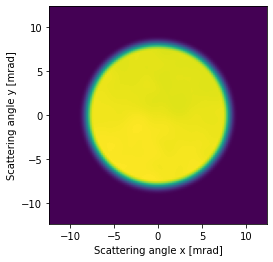

In [20]:
measurement.show()